Data Description - This dataset utilizes data frpm 2014 Major League Baseball seasons to develop an algorithm that predicts the number of wins for a given team in 2015 seasons based on parameters. There are 16 different features that will be used as inpute to machine learning model to predict number of wins. Inputs features - Runs, At Bats, Hits, Doubles, Triples, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Runs Average(ERA), Shoutouts, Saves, Complete Games and errors. Output - Number of predicted wins(W)

In [4]:
#Importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1. Data Selection

In [5]:
# Loading the dataset

df=pd.read_csv ("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.head() #Showing the first five rows.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df.sample(5) #showing the middle five rows.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78


In [8]:
df.tail(5) #showing the last five rows

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


Name and Short form :  Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
                       Output: Number of predicted wins (W).

In [9]:
df.shape # checking data dimension

(30, 17)

There are Total 30 rows and 17 columns in dataset

In [10]:
pd.set_option('display.max_rows',None)

#pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5

In [11]:
df.info() #information about dataset like data type, Null values etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
df.dtypes #data type

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

From above dataset, ERA(Earned Run Average) has float dataset ans rest of the dataset has integer formate.

In [13]:
df.columns # checking columns name.

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [14]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

From above dataset, It is clear that above dataset has no null values.

In [15]:
#check duplicate data
df.duplicated().sum()

0

There is no dublicate entry in present datasets

# Step 2. Data description

# Visulization of data

In [16]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In 30 data points, Number of Wins (W) dataset classified it into different Wins parameters like 68, 81, 74 upto 64. Parameter 68 has highest datapoints i.e.,3 whereas parameter from 80 to 64 has lowest i.e., 1.

In [17]:
data = df['W'].value_counts() #Storing target values in the variable data.

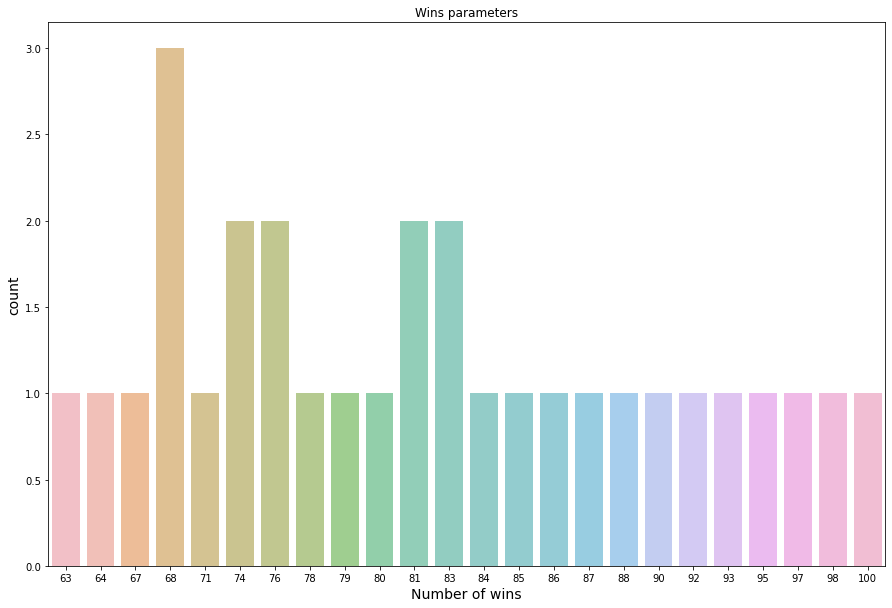

In [18]:
#Let's visulaized target parameter.

plt.figure(figsize=(15,10))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel("Number of wins",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.title("Wins parameters")
plt.show()

Bar Plot helps to visualized all parameters better. Above graphs showing Number of wins parameters (X-Axis) and there number of data points count (Y-Axis). Now visualized every parameter (features) with quality (Label) parameter with help of scatter plot.

In [19]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

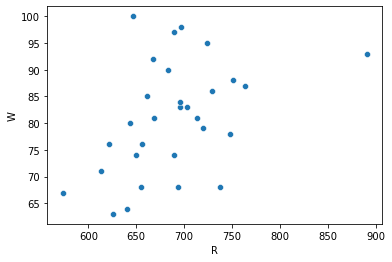

In [20]:
sns.scatterplot(x='R',y='W',data=df)

It showing relationship between R with respect to W parameter.

<AxesSubplot:xlabel='AB', ylabel='W'>

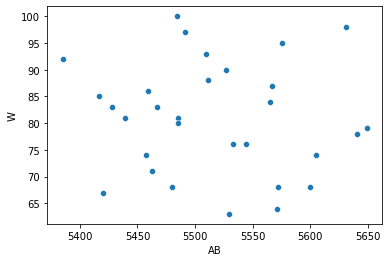

In [21]:
sns.scatterplot(x='AB',y='W',data=df)

It showing relationship between AB with respect to W parameter.

<AxesSubplot:xlabel='H', ylabel='W'>

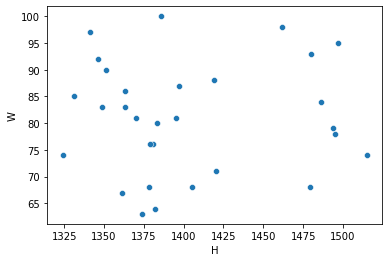

In [22]:
sns.scatterplot(x='H',y='W',data=df)

It showing relationship between H with respect to W parameter.

<AxesSubplot:xlabel='2B', ylabel='W'>

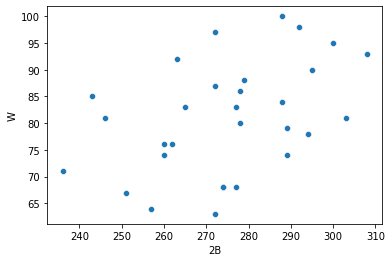

In [23]:
sns.scatterplot(x='2B',y='W',data=df)

It showing relationship between 2B with respect to W parameter.

<AxesSubplot:xlabel='3B', ylabel='W'>

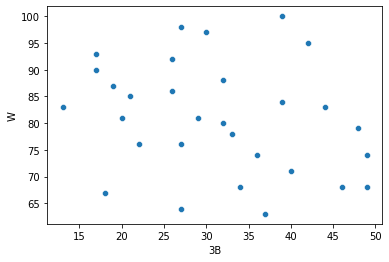

In [24]:
sns.scatterplot(x='3B',y='W',data=df)

It showing relationship between 3B with respect to W parameter.

<AxesSubplot:xlabel='HR', ylabel='W'>

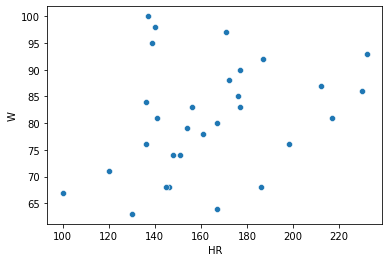

In [25]:
sns.scatterplot(x='HR',y='W',data=df)

It showing relationship between HR with respect to W parameter.

<AxesSubplot:xlabel='BB', ylabel='W'>

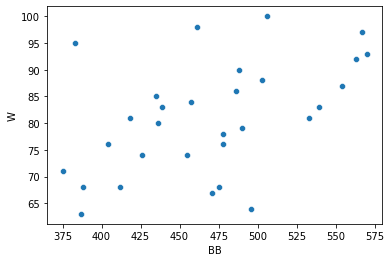

In [26]:
sns.scatterplot(x='BB',y='W',data=df)

It showing relationship between BB with respect to W parameter.

<AxesSubplot:xlabel='SO', ylabel='W'>

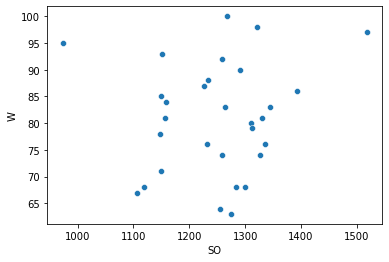

In [27]:
sns.scatterplot(x='SO',y='W',data=df)

It showing relationship between SO with respect to W parameter.

<AxesSubplot:xlabel='SB', ylabel='W'>

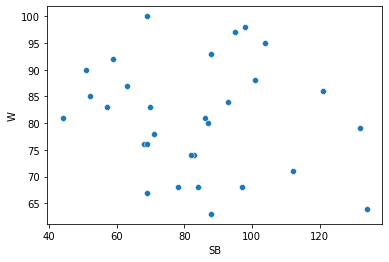

In [28]:
sns.scatterplot(x='SB',y='W',data=df)

It showing relationship between SB with respect to W parameter.

<AxesSubplot:xlabel='RA', ylabel='W'>

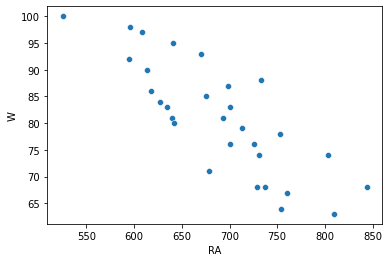

In [29]:
sns.scatterplot(x='RA',y='W',data=df)

<AxesSubplot:xlabel='ER', ylabel='W'>

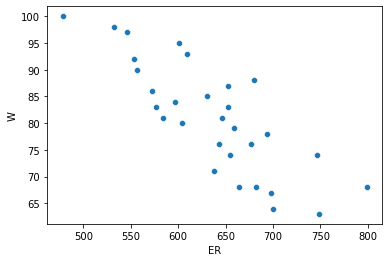

In [30]:
sns.scatterplot(x='ER',y='W',data=df)

It showing relationship between ER with respect to W parameter.

<AxesSubplot:xlabel='ERA', ylabel='W'>

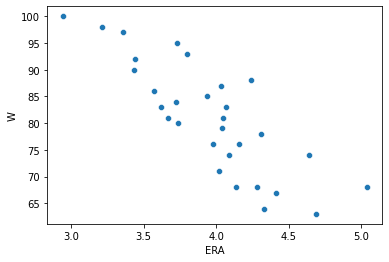

In [31]:
sns.scatterplot(x='ERA',y='W',data=df)

It showing relationship between ERA with respect to W parameter.

<AxesSubplot:xlabel='CG', ylabel='W'>

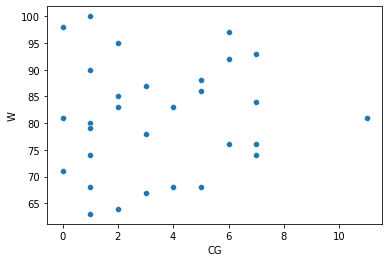

In [32]:
sns.scatterplot(x='CG',y='W',data=df)

It showing relationship between CG with respect to W parameter.

<AxesSubplot:xlabel='SHO', ylabel='W'>

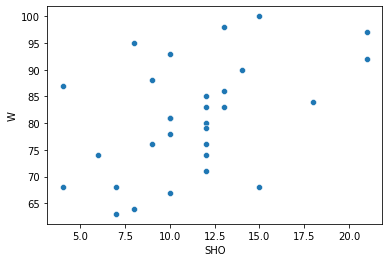

In [33]:
sns.scatterplot(x='SHO',y='W',data=df)

It showing relationship between SHO with respect to W parameter.

<AxesSubplot:xlabel='SV', ylabel='W'>

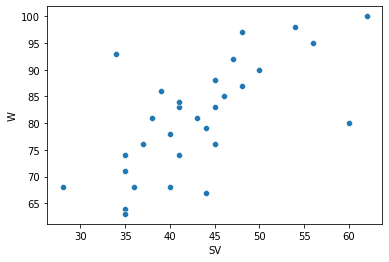

In [34]:
sns.scatterplot(x='SV',y='W',data=df)

It showing relationship between SV with respect to W parameter.

<AxesSubplot:xlabel='E', ylabel='W'>

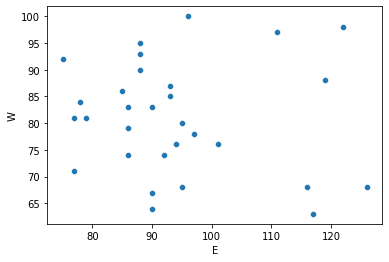

In [35]:
sns.scatterplot(x='E',y='W',data=df)


it showing relationship between E with respect to W parameter

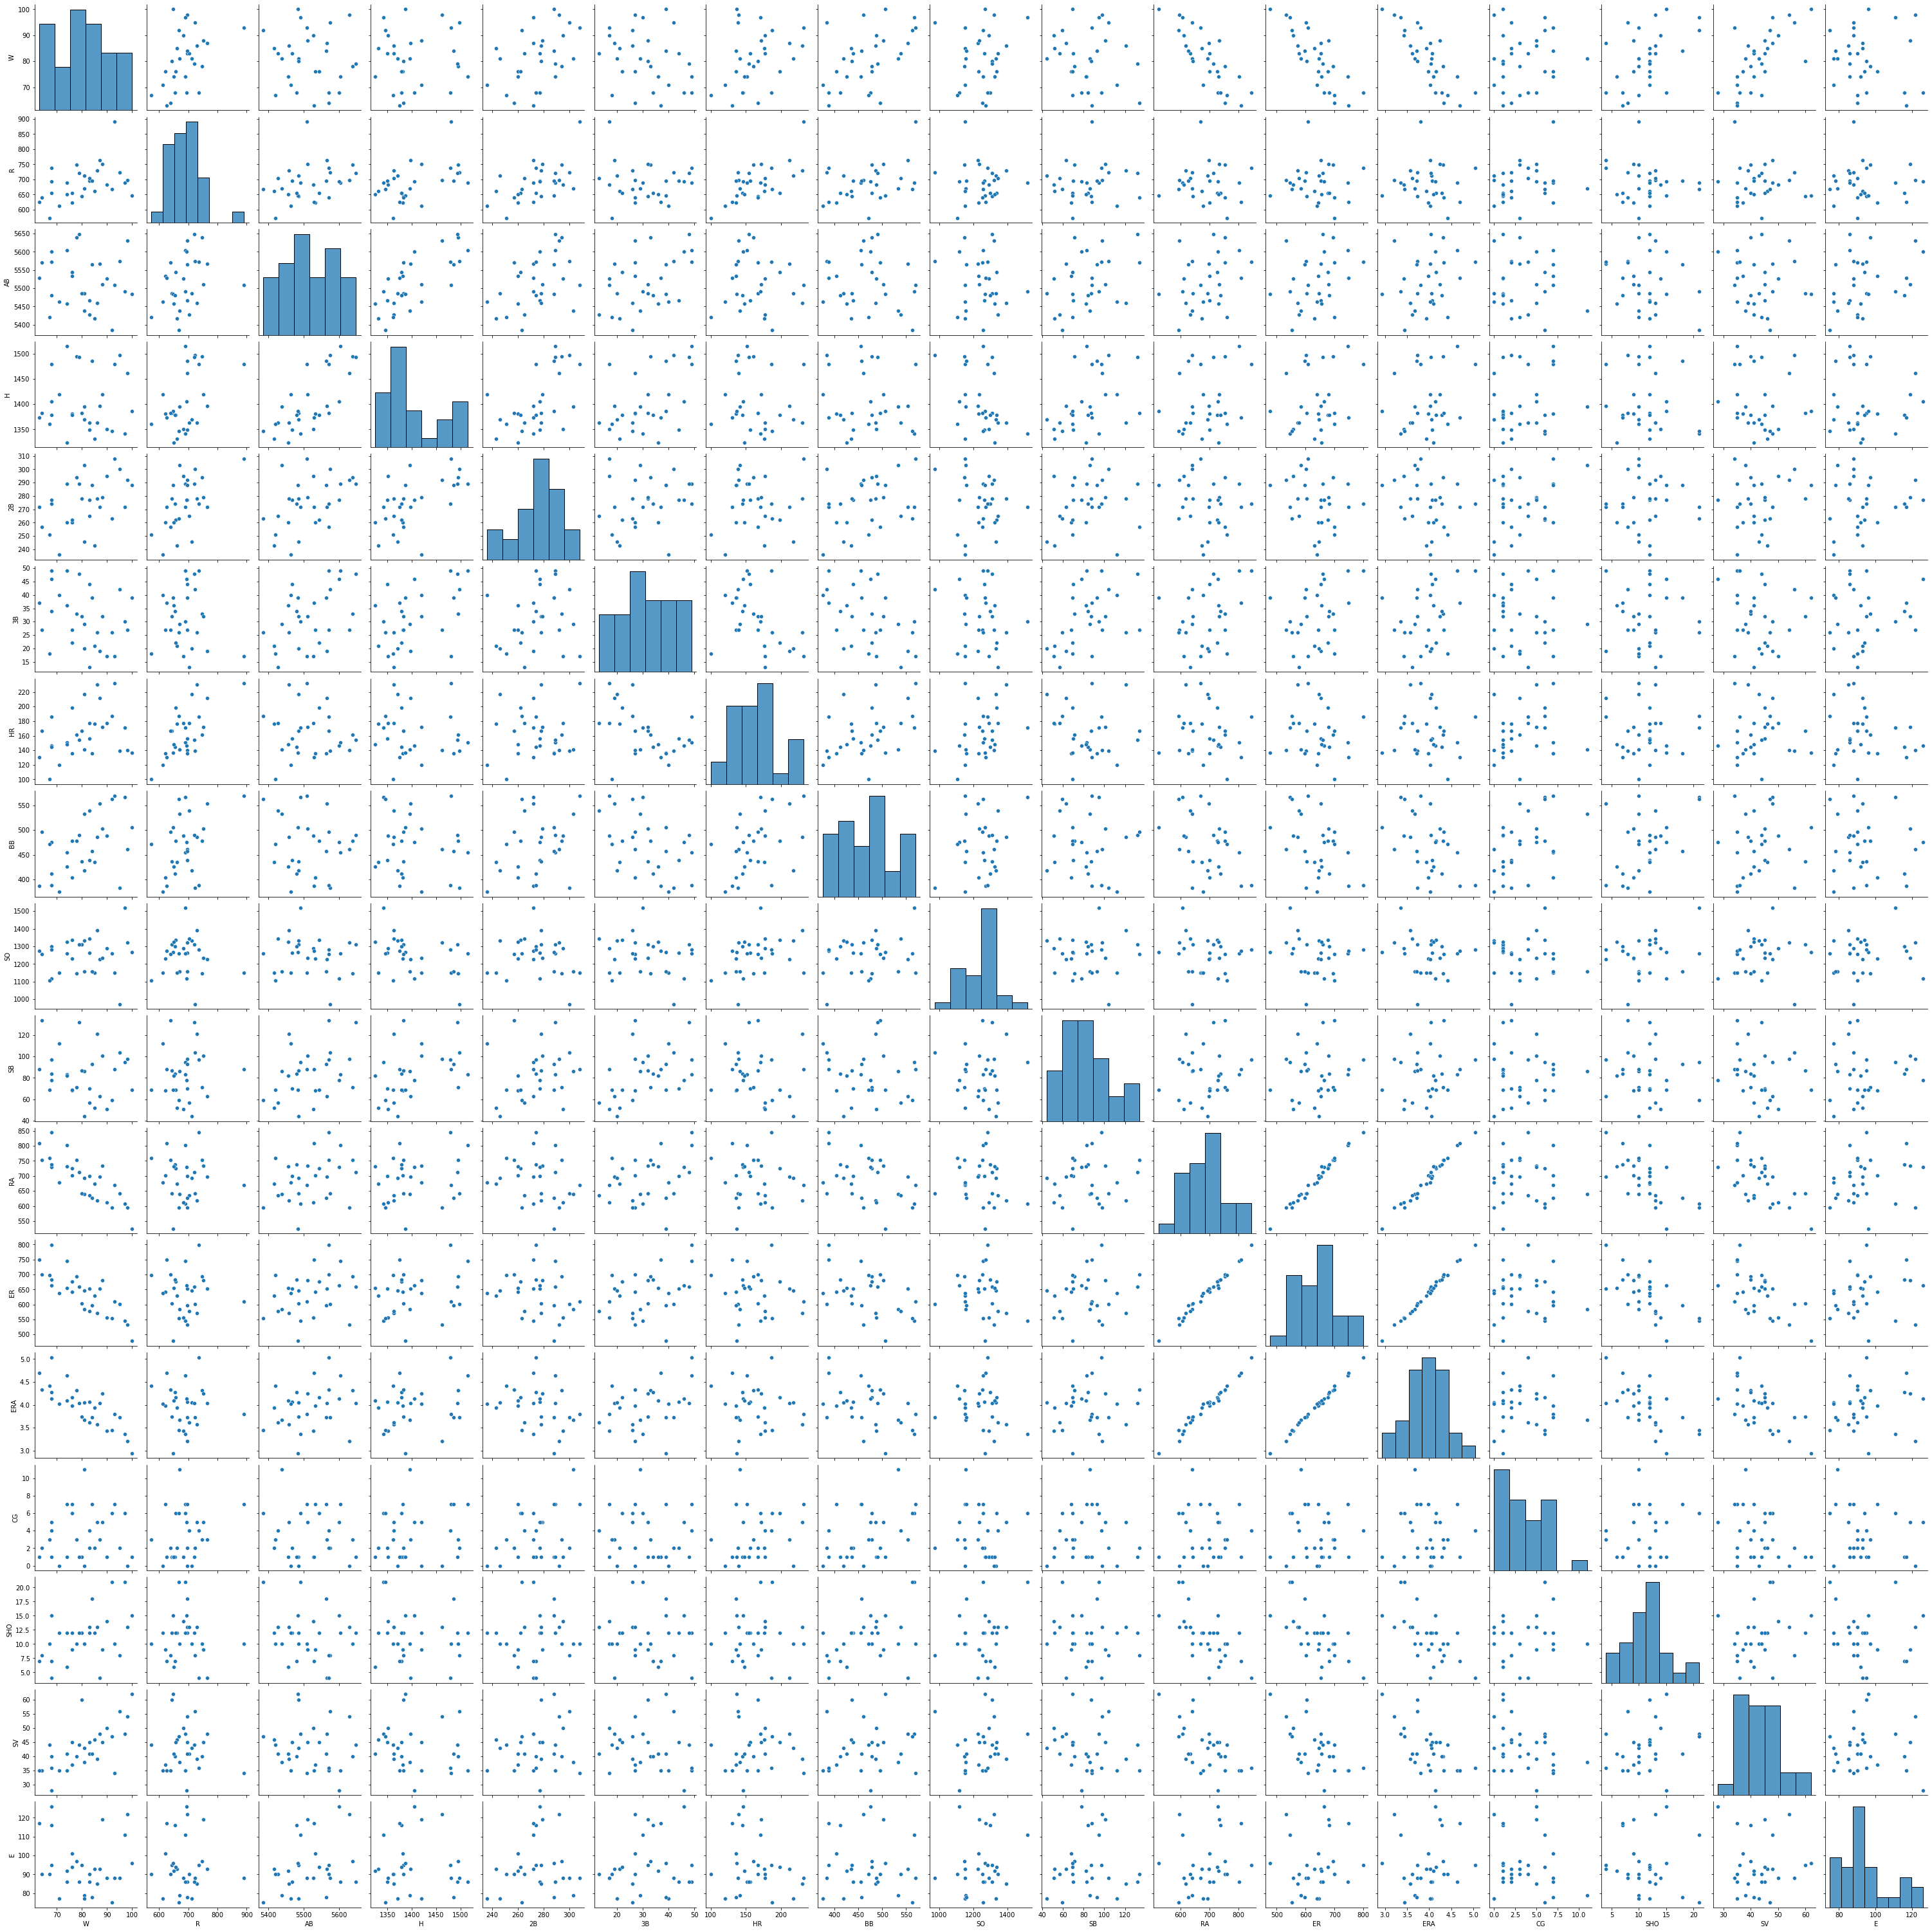

In [36]:
#Checking all graphs using pairplot method
sns.pairplot(df)
plt.show()

W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

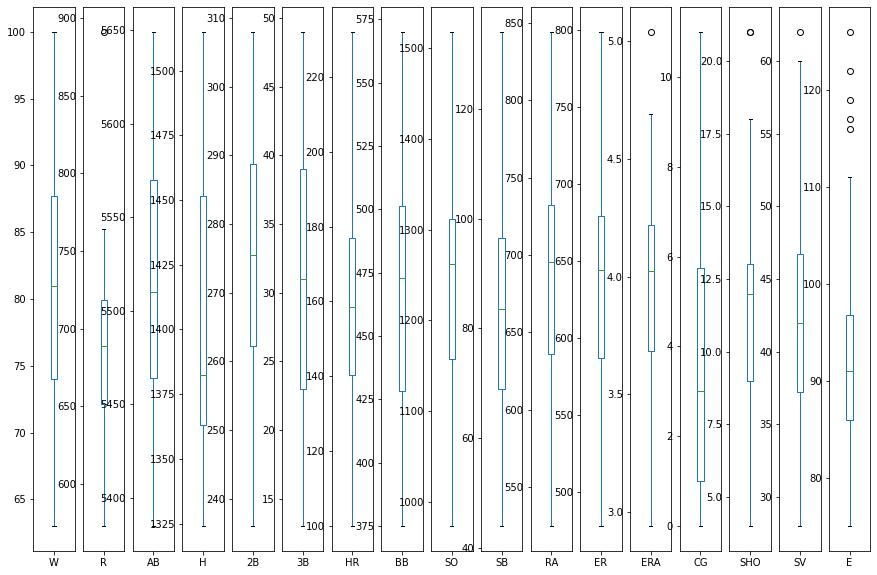

In [37]:
df.plot(kind='box',subplots=True,figsize=(15,10))

This Chart shows outliers are present in data we will remove outliers in data cleaning part

In [38]:
#Let's visulaized input parameter by using distplot to show outliers persent or not.

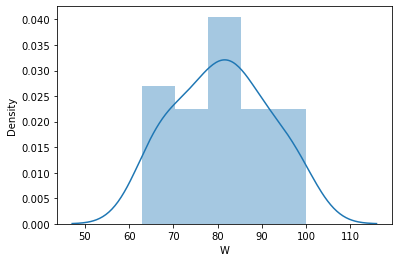

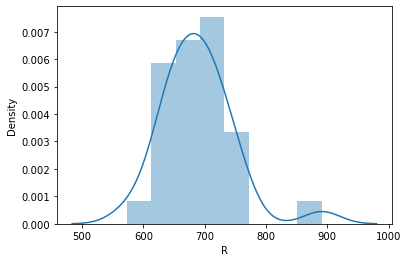

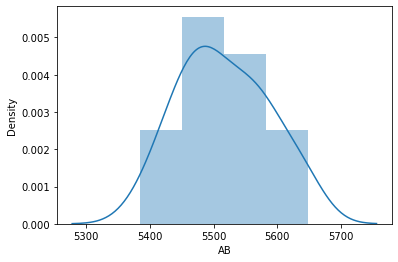

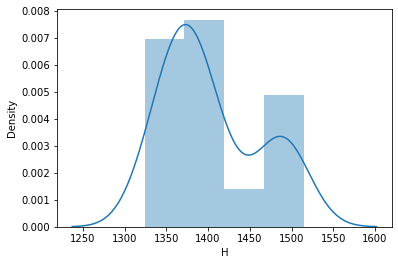

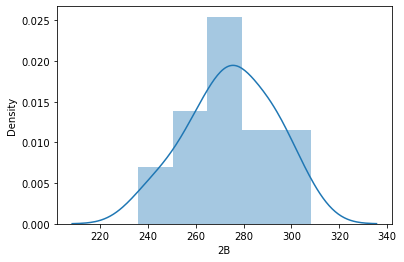

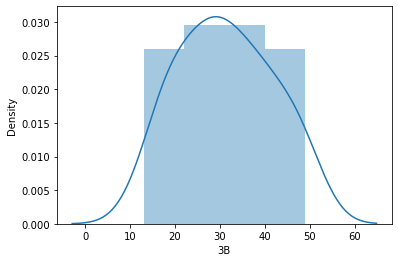

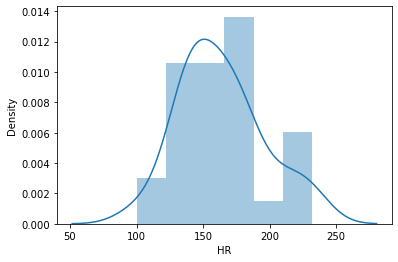

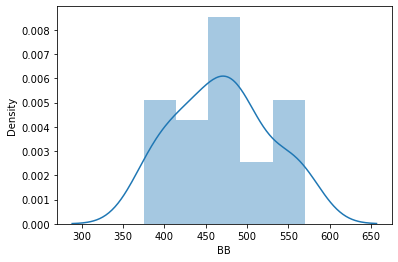

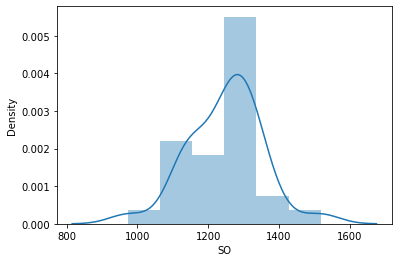

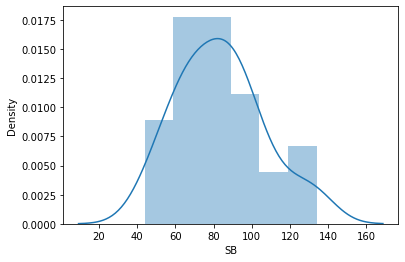

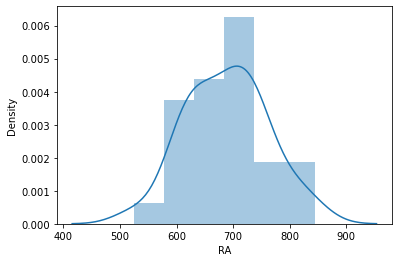

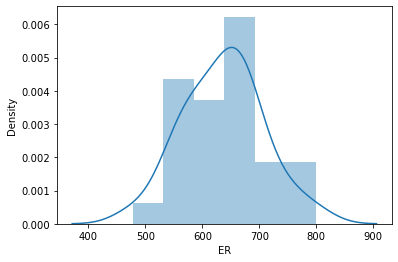

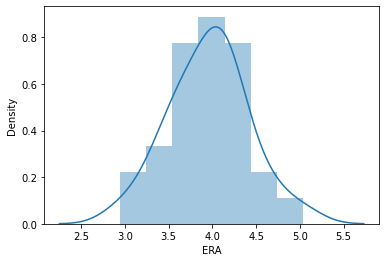

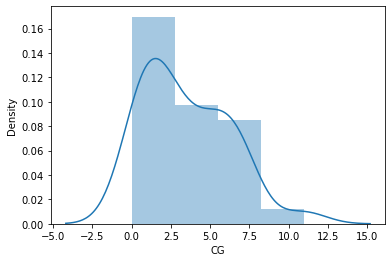

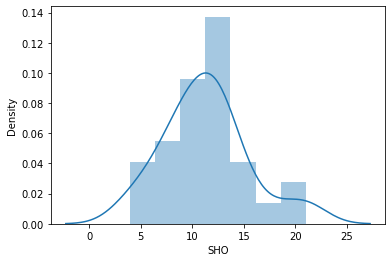

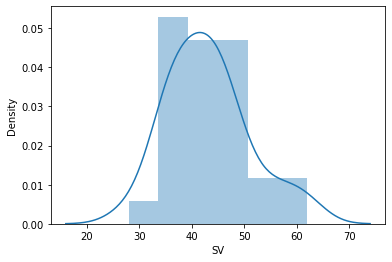

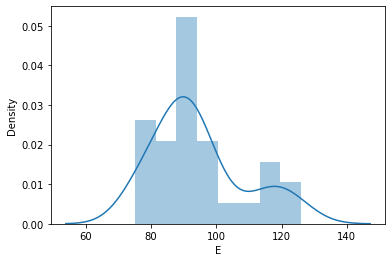

In [39]:
for i in df.columns:
    sns.distplot(df[i])
    plt.subplot(111)
    plt.show()

in above all input parameters to check the outliers are prenent is some input data to find by using distplot method

In [40]:
df.describe()  #statistical summary

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In above dataset there are total 30 counts across every columns. Countwise data is balanced. Describe method helps to understand about data set. It shows attributes like mean,max,min,std deviation, 25%,50%,75%. By comparing mean and 50% value attributes, there is no such big difference between them except AB, H, HR, BB, SO, RA, ER, CG, SHO, SV, E. So it is clear that outliers present in dataset.

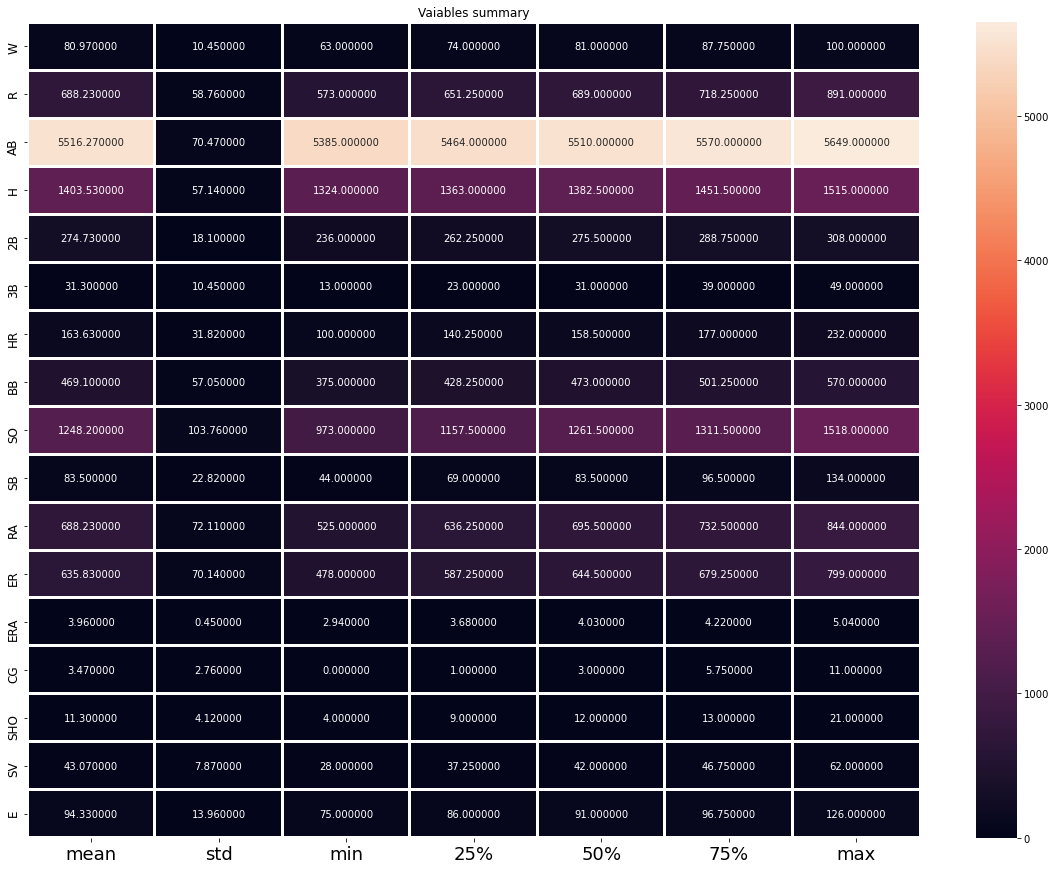

In [41]:
# Let's visualized above dataset.

plt.figure(figsize=(20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Vaiables summary")
plt.show()

In [42]:
# Checking for correlation

In [43]:
corr=df.corr()
corr


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


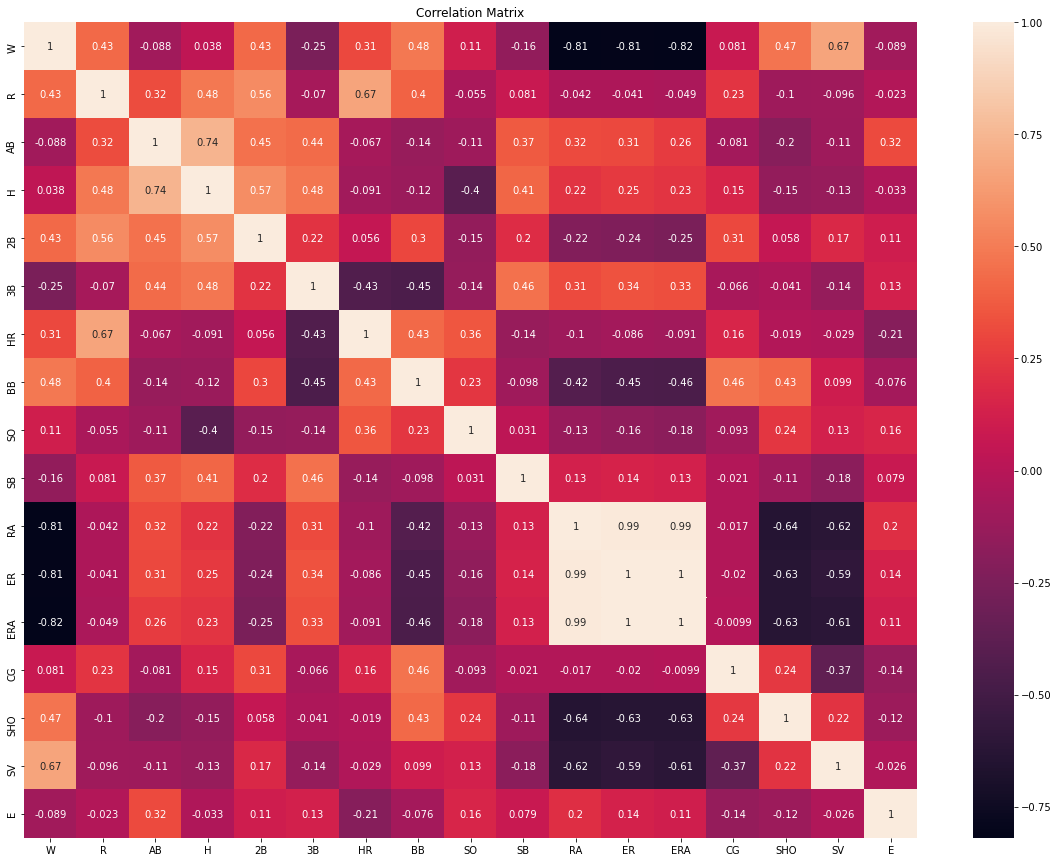

In [44]:
# visulization of correlated values.

plt.figure(figsize=(20,15))
sns.heatmap(data=corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

All columns of database are not positively correlated. R has -2.3%, AB has 32%, H has -3.3%, 2B has 11%, 3B has 13%, HR has -21%, BB has -7.6%, SO has 16%, SB has 7.9%, RA has 20%, ER has 14%, ERA has 11%, CG has -14%, SHO has -12%, SV has -2.6%. Max Correlation: AB Min Correlation: HR

# VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [47]:
valcal()

      vif factor features
0    1164.543214        W
1    3253.807721        R
2    5181.779465       AB
3    4817.334228        H
4    1157.105781       2B
5      32.435486       3B
6     309.301103       HR
7     302.099558       BB
8     400.292880       SO
9      28.665516       SB
10  18170.014649       RA
11  51175.790270       ER
12  23668.747242      ERA
13     10.411616       CG
14     33.258426      SHO
15    331.282416       SV
16     96.958680        E


In [48]:
df.shape

(30, 17)

# Data Cleaning

Removing Outliers

In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(df))

In [51]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [52]:
df_new=df[(z<3).all(axis=1)]

In [53]:
df_new.shape

(29, 17)

In [54]:
loss_of_data=(30-29)/30*100
loss_of_data

3.3333333333333335

In [55]:
df=df_new

In [56]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

AS VIF of ER=51175 ERA=23668

so we will drop this columns.

In [58]:
df=df.drop(['ER','ERA'],axis=1)

In [59]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [60]:
s=['R','CG','SHO','SV']

for i in s:
    df[i]=np.sqrt(df[i])

In [61]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,26.907248,5575,1497,300,42,139,383,973,104,641,1.414214,2.828427,7.483315,88
1,83,26.381812,5467,1349,277,44,156,439,1264,70,700,1.414214,3.464102,6.708204,86
2,81,25.865034,5439,1395,303,29,141,533,1157,86,640,3.316625,3.162278,6.164414,79
3,76,24.939928,5533,1381,260,27,136,404,1231,68,701,2.645751,3.000000,6.082763,101
4,74,26.248809,5605,1515,289,49,151,455,1259,83,803,2.645751,3.464102,5.916080,86


In [62]:
x=df.drop('W',axis=1)
y=df['W']

# STANDARD SCALER

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std=StandardScaler()

In [65]:
X=std.fit_transform(x)

In [66]:
x=X

In [67]:
x.shape

(29, 14)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [70]:
ln=LinearRegression()

In [71]:
for i in range(0,15000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    ln.fit(x_train,y_train)
    pred_train=ln.predict(x_train)
    pred_test=ln.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y_train,pred_train)*100)
        print("Test Score",r2_score(y_test,pred_test)*100)

At Random score 12721 Model Performance is very well
Random stata is: 12721
Train Score 90.4596261212344
Test Score 90.45651956149644


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12721,test_size=0.20)

In [73]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [74]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [75]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [76]:
fun(ln)

Taining Score:- 90.4596261212344
Mean Absolute Error 3.556053319363149
Mean Squared Error 13.763819565752906
Root Mean Squared Erro 3.709962205434566
R2 Score 90.45651956149644


In [77]:
fun(svr)

Taining Score:- 25.238995687548595
Mean Absolute Error 9.869988284482396
Mean Squared Error 154.22224639062253
Root Mean Squared Erro 12.418624979868847
R2 Score -6.93376097963041


In [78]:
fun(svrl)

Taining Score:- 83.84996293903252
Mean Absolute Error 3.5080242233497287
Mean Squared Error 23.650166922306145
Root Mean Squared Erro 4.863143728320822
R2 Score 83.60157917559667


In [79]:
fun(svrp)

Taining Score:- 41.77478871031296
Mean Absolute Error 9.817417396442826
Mean Squared Error 150.9650088904328
Root Mean Squared Erro 12.286781876896521
R2 Score -4.675275810007351


In [80]:
fun(dtc)

Taining Score:- 100.0
Mean Absolute Error 6.0
Mean Squared Error 47.333333333333336
Root Mean Squared Erro 6.879922480183431
R2 Score 67.18027734976889


In [81]:
fun(knn)

Taining Score:- 56.47020947802197
Mean Absolute Error 7.400000000000001
Mean Squared Error 70.2666666666667
Root Mean Squared Erro 8.382521498133285
R2 Score 51.278890600924484


# Ensemble Method

In [82]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [83]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gfr=GradientBoostingRegressor()

In [84]:
fun(rfr)

Taining Score:- 91.27816127232143
Mean Absolute Error 5.775000000000001
Mean Squared Error 52.79798333333334
Root Mean Squared Erro 7.266222081201024
R2 Score 63.39122881355932


In [85]:
fun(adr)

Taining Score:- 98.53951799068986
Mean Absolute Error 5.031746031746034
Mean Squared Error 38.85789871504159
Root Mean Squared Erro 6.233610407704479
R2 Score 73.05692693101892


In [86]:
fun(gfr)

Taining Score:- 99.9999769128999
Mean Absolute Error 6.3603446029259105
Mean Squared Error 54.52894284281489
Root Mean Squared Erro 7.38437152659689
R2 Score 62.19102576384176


# Regularization

In [88]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [89]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

In [90]:
fun(ls)

Taining Score:- 85.53217182986624
Mean Absolute Error 3.6982176342166846
Mean Squared Error 23.584618706488882
Root Mean Squared Erro 4.856399767985424
R2 Score 83.64702863186442


In [92]:
fun(rd)

Taining Score:- 89.72789288380318
Mean Absolute Error 3.457457271175675
Mean Squared Error 16.196477047997963
Root Mean Squared Erro 4.024484693472937
R2 Score 88.76977708536351


In [93]:
fun(es)

Taining Score:- 80.02688348882164
Mean Absolute Error 4.995010398811144
Mean Squared Error 35.51398236258955
Root Mean Squared Erro 5.95936090219325
R2 Score 75.3755129997453


# HyperTuning For Best Score

LinearRegression

In [94]:
p1={'n_jobs':[1,2,3,4,5],'copy_X':['True','False'],'fit_intercept':['True','False'],'positive':['True','False']}

In [95]:
g1=GridSearchCV(ln,p1)
g1.fit(x,y)
print(g1.best_params_)

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}


In [96]:
ln1=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1)

In [97]:
fun(ln1)

Taining Score:- 90.4596261212344
Mean Absolute Error 3.556053319363149
Mean Squared Error 13.763819565752906
Root Mean Squared Erro 3.709962205434566
R2 Score 90.45651956149644


In [98]:
p2={'alpha':[10,1,0.1,0.001,0.0001,0.00001],'fit_intercept':['True','False'],'copy_X':['True','False'],'max_iter':[10,50,75,100,250,500,1000,3000,5000,10000],'selection':['cyclic','random'],'positive':['True','False']}

In [99]:
g2=GridSearchCV(ls,p2)
g2.fit(x,y)
print(g2.best_params_)

{'alpha': 0.1, 'copy_X': 'True', 'fit_intercept': 'False', 'max_iter': 10, 'positive': 'False', 'selection': 'random'}


In [100]:
ls1=Lasso(alpha=0.001,copy_X=False,max_iter=5,fit_intercept=True)

In [101]:
fun(ls1)

Taining Score:- 89.15676449943028
Mean Absolute Error 3.995979637306194
Mean Squared Error 20.44451802671573
Root Mean Squared Erro 4.5215614589117035
R2 Score 85.8242941263142


RIDGE

In [102]:
p3={'alpha':[10,1,0.1,0.01,0.001,0.0001],'fit_intercept':['True','False'],'copy_X':['True','False'],'max_iter':[5,10,50,75,100,250,500]}

In [103]:
g3=GridSearchCV(rd,p3)
g3.fit(x,y)
print(g3.best_params_)

{'alpha': 1, 'copy_X': 'True', 'fit_intercept': 'True', 'max_iter': 5}


In [104]:
rd1=Ridge(alpha=1,copy_X=True,fit_intercept=True,max_iter=5)

In [105]:
fun(rd1)

Taining Score:- 89.72789288380318
Mean Absolute Error 3.457457271175675
Mean Squared Error 16.196477047997963
Root Mean Squared Erro 4.024484693472937
R2 Score 88.76977708536351


# Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
score=cross_val_score(ls1,x,y,cv=3)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.37135514072028925


In [108]:
score=cross_val_score(ln1,x,y,cv=4)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.2621716827125785


In [109]:
score=cross_val_score(knn,x,y,cv=3)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.21661012743046967


In [110]:
score=cross_val_score(rd,x,y,cv=3)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.3725601689930828


In [111]:
score=cross_val_score(svrl,x,y,cv=3)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.4379184198514321


In [112]:
score=cross_val_score(rd1,x,y,cv=3)
print("At value of cv=3 score is",score.mean())

At value of cv=3 score is 0.3725601689930828


# Model Saving:
From the R2_Score ,RMSE and CV score we get best output in RIDGE.

In [113]:
import pickle
filename='BaseBall_Prediction.pkl'
pickle.dump(rd1,open(filename,'wb'))

# Conclusion:-

    Actual    Predict
27      79  82.939633
19      64  68.884755
17      97  90.345166
2       81  80.883453
6       87  89.227386
15     100  97.078412


Text(0.5, 1.0, 'RIDGE Regressor')

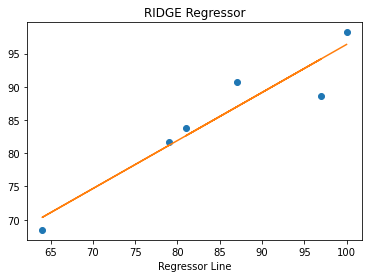

In [114]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rd1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(ls1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('RIDGE Regressor')